In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import CustomClass
from func_file import train_model, test_model, collate_fn

데이터 출처<hr>
- https://www.kaggle.com/datasets/backalla/words-mnist
- https://tc11.cvc.uab.es/datasets/
- https://www.kaggle.com/datasets/hnthnt/jp-font-image-dataset-02?select=00000083.jpg
- https://www.kaggle.com/datasets/ngkinwang/iam-dataset
- https://www.kaggle.com/datasets/ravi02516/20-ocr-dataset
- https://www.kaggle.com/datasets/frlemarchand/synthetic-kmnist-pages?select=synthetic_kmnist_pages.csv

In [2]:
data_path = './data/archive/'

In [3]:
labels = pd.read_json(data_path+'v011_labels_small.json', typ='series')
labels

0.jpeg              BE
1.jpeg             the
2.jpeg              TO
3.jpeg            the+
4.png            Marks
               ...    
9995.jpeg      exactly
9996.png       Explain
9997.jpeg        COULD
9998.jpeg           NO
9999.jpeg    reproduce
Length: 10000, dtype: object

In [4]:
labels.value_counts().head(10)

the    504
of     297
and    204
to     170
in     128
is      89
a       73
are     62
THE     59
for     58
Name: count, dtype: int64

In [5]:
transformer = v2.Compose(transforms=
                                 [transforms.ToTensor(),
                                  v2.Resize(size=[64,128])
                                  ])

In [6]:
img_name_list = os.listdir(data_path+'dataset/v011_words_small')

In [7]:
img_list = []

In [8]:
for img_name in img_name_list:
    img = Image.open(data_path+'dataset/v011_words_small/'+img_name)
    img_list.append(transformer(img).numpy())
    img.close()

In [9]:
type(img_list[1099])

numpy.ndarray

In [10]:
type(img_list)

list

In [11]:
img_list[1099].shape

(3, 64, 128)

In [12]:
img_list

[array([[[0.85490197, 0.85490197, 0.85490197, ..., 1.        ,
          1.        , 1.        ],
         [0.85490197, 0.85490197, 0.85490197, ..., 1.        ,
          1.        , 1.        ],
         [0.9013787 , 0.9013787 , 0.9013787 , ..., 1.        ,
          1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        , ..., 0.99466914,
          0.99466914, 0.99466914],
         [1.        , 1.        , 1.        , ..., 0.99215686,
          0.99215686, 0.99215686],
         [1.        , 1.        , 1.        , ..., 0.99215686,
          0.99215686, 0.99215686]],
 
        [[0.85490197, 0.85490197, 0.85490197, ..., 1.        ,
          1.        , 1.        ],
         [0.85490197, 0.85490197, 0.85490197, ..., 1.        ,
          1.        , 1.        ],
         [0.9013787 , 0.9013787 , 0.9013787 , ..., 1.        ,
          1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        , ..., 0.99466914,
          0.99466914, 0.

In [13]:
img_TS = torch.tensor(img_list)

C:\Users\낙지들의왕\AppData\Local\Temp\ipykernel_26976\2937353655.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  img_TS = torch.tensor(img_list)


In [14]:
img_TS.shape

torch.Size([10000, 3, 64, 128])

In [15]:
img_TS[0]

tensor([[[0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.9014, 0.9014, 0.9014,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9947, 0.9947, 0.9947],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.9014, 0.9014, 0.9014,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9947, 0.9947, 0.9947],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.9014, 0.9014, 0.9014,  ..., 1.0000, 1.0000, 1.

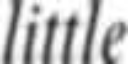

In [16]:
tf = transforms.ToPILImage()
sample = tf(img_TS[12])
sample

In [17]:
eng_only_vocab = CustomClass.Vocab()
eng_only_vocab.resetCode()

In [18]:
for label in labels:
    if '—' in label:
        print(label)

:—
—
:—
:—
:—
:—
—
—
:—
—
—
era.—Elucidate
:—
:—
:—


In [19]:
punc = set()
for label in labels.values:
    try:
        print(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))
    except:
        print(label)
        for l in label:
            if l not in eng_only_vocab.encoder.keys():
                punc.add(l)

[61, 64]
[53, 41, 38]
[79, 74]
[53, 41, 38, 12]
[72, 34, 51, 44, 52]
[90, 86]
[35, 54, 53]
[37, 48, 40, 52]
[56, 41, 34, 53]
[39, 42, 55, 38]
[41, 48, 54, 51, 52, 10]
[56, 34, 52]
[68, 79]
[62, 48, 54, 51, 53, 52]
[52, 53, 34, 53, 38, 46, 38, 47, 53]
[34, 52, 44, 38, 37]
[52, 53, 38, 34, 46, 35, 48, 34, 53]
[52, 41, 48, 51, 53]
[38, 34, 51, 45, 58]
[41, 42, 52]
[41, 34, 52]
[82, 74, 80, 71, 63]
[46, 42, 52, 53, 34, 44, 38, 52]
[48, 39, 53, 38, 47, 38, 51]
[53, 51, 34, 55, 38, 45, 42, 47, 40]
[53, 41, 38]
[82, 74, 77, 79, 67]
[56, 38, 51, 38]
[75, 51, 42, 36, 38]
[92]
[53, 41, 38]
[41, 42, 52]
[9, 42, 10]
[35, 38, 51, 58, 45, 52]
[53, 41, 38, 48, 51, 58]
[87, 88, 6]
[49, 48, 45, 42, 36, 58, 15]
[65, 51, 48, 46]
[53, 41, 38, 58]
[56, 34, 58]
[78, 34, 46, 49, 45, 38]
[52, 41, 38]
[62, 48, 47, 15]
[53, 48, 45, 37]
[49, 51, 48, 39, 42, 53]
[53, 41, 38]
[80, 73, 71, 74, 74, 78, 64, 73, 64, 63]
[53, 41, 48, 54, 40, 41]
[48, 54, 51]
[36, 41, 38, 36, 44]
you \
[56, 41, 42, 52, 53, 45, 38]
[34, 

In [20]:
# 얍삽한 녀석들
punc

{' ', '©', '°', '—', '‘', '’', '“', '”'}

In [21]:
# 얍삽한 녀석들 바꾸기
punc_dict = {' ':'<PAD>', '©':'<UNK>', '°':'<UNK>', '—':'-', '‘':'\'', '’':'\'', '“':'\"', '”':'\"'}

In [22]:
for label in labels.values:
    try:
        print(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))
    except KeyError as e:
        label = (list(map(lambda x:punc_dict[x] if x in punc_dict.keys() else x, list(label))))
        print(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))

[61, 64]
[53, 41, 38]
[79, 74]
[53, 41, 38, 12]
[72, 34, 51, 44, 52]
[90, 86]
[35, 54, 53]
[37, 48, 40, 52]
[56, 41, 34, 53]
[39, 42, 55, 38]
[41, 48, 54, 51, 52, 10]
[56, 34, 52]
[68, 79]
[62, 48, 54, 51, 53, 52]
[52, 53, 34, 53, 38, 46, 38, 47, 53]
[34, 52, 44, 38, 37]
[52, 53, 38, 34, 46, 35, 48, 34, 53]
[52, 41, 48, 51, 53]
[38, 34, 51, 45, 58]
[41, 42, 52]
[41, 34, 52]
[82, 74, 80, 71, 63]
[46, 42, 52, 53, 34, 44, 38, 52]
[48, 39, 53, 38, 47, 38, 51]
[53, 51, 34, 55, 38, 45, 42, 47, 40]
[53, 41, 38]
[82, 74, 77, 79, 67]
[56, 38, 51, 38]
[75, 51, 42, 36, 38]
[92]
[53, 41, 38]
[41, 42, 52]
[9, 42, 10]
[35, 38, 51, 58, 45, 52]
[53, 41, 38, 48, 51, 58]
[87, 88, 6]
[49, 48, 45, 42, 36, 58, 15]
[65, 51, 48, 46]
[53, 41, 38, 58]
[56, 34, 58]
[78, 34, 46, 49, 45, 38]
[52, 41, 38]
[62, 48, 47, 15]
[53, 48, 45, 37]
[49, 51, 48, 39, 42, 53]
[53, 41, 38]
[80, 73, 71, 74, 74, 78, 64, 73, 64, 63]
[53, 41, 48, 54, 40, 41]
[48, 54, 51]
[36, 41, 38, 36, 44]
[58, 48, 54, 0, 25]
[56, 41, 42, 52, 53,

In [23]:
encoded_label = []
for label in labels.values:
    try:
        encoded_label.append(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))
    except KeyError as e:
        label = (list(map(lambda x:punc_dict[x] if x in punc_dict.keys() else x, list(label))))
        encoded_label.append(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))

In [24]:
DS1 = CustomClass.CustomDataset(img_TS, labels.values, eng_only_vocab)

In [25]:
check_id = 1200
DS1[check_id][1], labels.values[check_id], len(DS1[check_id][1]), len(labels.values[check_id])

(array([62, 74, 73, 78, 68, 63, 64, 77, 60, 61, 71, 64]),
 'CONSIDERABLE',
 12,
 12)

In [26]:
torch.random.manual_seed(100)
gen = torch.Generator().manual_seed(100)

In [27]:
trainDS1, validDS1, testDS1 = random_split(DS1, [0.7, 0.15, 0.15], generator=gen)

In [28]:
torch.cuda.is_available()

True

In [29]:
for d in trainDS1:
    print(d[1].shape)

(4,)
(3,)
(10,)
(2,)
(4,)
(2,)
(4,)
(3,)
(5,)
(4,)
(7,)
(8,)
(9,)
(6,)
(5,)
(9,)
(2,)
(3,)
(4,)
(7,)
(2,)
(4,)
(8,)
(6,)
(6,)
(6,)
(2,)
(3,)
(10,)
(7,)
(7,)
(12,)
(5,)
(4,)
(5,)
(7,)
(3,)
(2,)
(5,)
(6,)
(5,)
(5,)
(2,)
(2,)
(6,)
(7,)
(3,)
(4,)
(2,)
(2,)
(2,)
(8,)
(5,)
(2,)
(10,)
(4,)
(8,)
(3,)
(2,)
(5,)
(6,)
(2,)
(3,)
(4,)
(6,)
(2,)
(9,)
(5,)
(8,)
(6,)
(2,)
(8,)
(4,)
(3,)
(2,)
(3,)
(3,)
(3,)
(10,)
(4,)
(10,)
(9,)
(7,)
(10,)
(10,)
(4,)
(4,)
(3,)
(7,)
(6,)
(3,)
(4,)
(3,)
(7,)
(3,)
(3,)
(6,)
(8,)
(8,)
(6,)
(4,)
(5,)
(3,)
(3,)
(8,)
(3,)
(7,)
(2,)
(2,)
(2,)
(4,)
(5,)
(5,)
(5,)
(4,)
(3,)
(4,)
(6,)
(4,)
(2,)
(9,)
(2,)
(4,)
(3,)
(2,)
(2,)
(2,)
(4,)
(9,)
(4,)
(3,)
(2,)
(4,)
(7,)
(10,)
(4,)
(7,)
(7,)
(8,)
(5,)
(4,)
(5,)
(3,)
(2,)
(4,)
(3,)
(3,)
(2,)
(2,)
(2,)
(5,)
(2,)
(2,)
(9,)
(2,)
(10,)
(6,)
(2,)
(4,)
(3,)
(2,)
(4,)
(7,)
(9,)
(2,)
(4,)
(1,)
(7,)
(2,)
(4,)
(4,)
(2,)
(2,)
(8,)
(4,)
(5,)
(3,)
(5,)
(3,)
(4,)
(9,)
(6,)
(2,)
(3,)
(3,)
(2,)
(4,)
(7,)
(4,)
(3,)
(8,)
(8,)
(3,)
(2,)
(4,)
(5,)
(2,)
(11,)

In [30]:
trainDS1[0], trainDS1[0][0].shape, trainDS1[0][1].shape

((tensor([[[0.8636, 0.8970, 0.8999,  ..., 0.5343, 0.5339, 0.6871],
           [0.8624, 0.8959, 0.8923,  ..., 0.4950, 0.4966, 0.6662],
           [0.8599, 0.8936, 0.8759,  ..., 0.4111, 0.4169, 0.6214],
           ...,
           [0.9681, 0.9648, 0.9545,  ..., 0.9699, 0.9685, 0.9556],
           [0.9738, 0.9698, 0.9573,  ..., 0.9757, 0.9699, 0.9556],
           [0.9765, 0.9721, 0.9586,  ..., 0.9784, 0.9705, 0.9556]],
  
          [[0.8636, 0.8970, 0.8999,  ..., 0.5343, 0.5339, 0.6871],
           [0.8624, 0.8959, 0.8923,  ..., 0.4950, 0.4966, 0.6662],
           [0.8599, 0.8936, 0.8759,  ..., 0.4111, 0.4169, 0.6214],
           ...,
           [0.9681, 0.9648, 0.9545,  ..., 0.9699, 0.9685, 0.9556],
           [0.9738, 0.9698, 0.9573,  ..., 0.9757, 0.9699, 0.9556],
           [0.9765, 0.9721, 0.9586,  ..., 0.9784, 0.9705, 0.9556]],
  
          [[0.8636, 0.8970, 0.8999,  ..., 0.5343, 0.5339, 0.6871],
           [0.8624, 0.8959, 0.8923,  ..., 0.4950, 0.4966, 0.6662],
           [0.8599, 0.

In [31]:
BATCH_SIZE = 100
trainDL1 = DataLoader(trainDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
validDL1 = DataLoader(validDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
testDL1 = DataLoader(testDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [32]:
len(trainDL1)

70

In [35]:
for idx, (f, t) in enumerate(trainDL1):
    print(f.shape, t.shape)
    if idx > 9:
        break

torch.Size([100, 3, 64, 128]) torch.Size([100, 15])
torch.Size([100, 3, 64, 128]) torch.Size([100, 14])
torch.Size([100, 3, 64, 128]) torch.Size([100, 16])
torch.Size([100, 3, 64, 128]) torch.Size([100, 14])
torch.Size([100, 3, 64, 128]) torch.Size([100, 10])
torch.Size([100, 3, 64, 128]) torch.Size([100, 12])
torch.Size([100, 3, 64, 128]) torch.Size([100, 13])
torch.Size([100, 3, 64, 128]) torch.Size([100, 12])
torch.Size([100, 3, 64, 128]) torch.Size([100, 10])
torch.Size([100, 3, 64, 128]) torch.Size([100, 15])
torch.Size([100, 3, 64, 128]) torch.Size([100, 13])


In [32]:
for f, t in trainDL1:
    print(f.shape, t.shape)
    print(f.dtype, t.dtype)
    print(f)
    print(t)
    break

torch.Size([100, 3, 64, 128]) torch.Size([100, 11])
torch.float32 torch.int32
tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9941, 0.9941, 0.9941,  ..., 0.7515, 0.7515, 0.7515],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9941, 0.9941, 0.9941,  ..., 0.7515, 0.7515, 0.7515],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomClass.CustomModel(3, len(eng_only_vocab)).to(device)
optim = torch.optim.Adam(model.parameters())
schd = torch.optim.lr_scheduler.ReduceLROnPlateau(optim)

In [34]:
model

CustomModel(
  (CNN): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(

In [35]:
# result = train_model(model, optim, trainDL1, validDL1, device, schd=schd)

In [36]:
# torch.save(model, './best_model100.pkl')

In [37]:
testModel1 = torch.load('./best_model10.pkl')
testModel2 = torch.load('./best_model100.pkl')

In [38]:
train_costs = [res.cpu().item() for res in result[0]]
valid_costs = [res.cpu().item() for res in result[1]]

plt.plot(train_costs)
plt.plot(valid_costs)
plt.legend(['train', 'valid'])
plt.grid(alpha=0.35)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

NameError: name 'result' is not defined

In [ ]:
test_model(testModel1, testDL1, device)

Proceeding....Trial   0 --- 
test cost = 0.3148222267627716
Trial   1 --- 
test cost = 0.3940672278404236
Trial   2 --- 
test cost = 0.20071212947368622
Trial   3 --- 
test cost = 0.5337355136871338
Trial   4 --- 
test cost = 0.4686189293861389
Trial   5 --- 
test cost = 0.4298945665359497
Trial   6 --- 
test cost = 0.41759055852890015
Trial   7 --- 
test cost = 0.18164369463920593
Trial   8 --- 
test cost = 0.3828892409801483
Trial   9 --- 
test cost = 0.5572231411933899
.Trial  10 --- 
test cost = 0.5124998092651367
Trial  11 --- 
test cost = 0.3466200530529022
Trial  12 --- 
test cost = 0.21647922694683075
Trial  13 --- 
test cost = 0.4508156478404999
Trial  14 --- 
test cost = 0.32404810190200806


In [ ]:
test_model(testModel2, testDL1, device)

Proceeding....Trial   0 --- 
test cost = 0.38053983449935913
Trial   1 --- 
test cost = 0.29599228501319885
Trial   2 --- 
test cost = 0.20171011984348297
Trial   3 --- 
test cost = 0.29164013266563416
Trial   4 --- 
test cost = 0.3382977843284607
Trial   5 --- 
test cost = 0.32075774669647217
Trial   6 --- 
test cost = 0.341287225484848
Trial   7 --- 
test cost = 0.5639881491661072
Trial   8 --- 
test cost = 0.32183638215065
Trial   9 --- 
test cost = 0.519855260848999
.Trial  10 --- 
test cost = 0.49854299426078796
Trial  11 --- 
test cost = 0.5369482040405273
Trial  12 --- 
test cost = 0.46100759506225586
Trial  13 --- 
test cost = 0.35913607478141785
Trial  14 --- 
test cost = 0.21949994564056396


In [39]:
from func_file import predict_model

In [40]:
text_img_dir_list = os.listdir(data_path+'dataset/predict')

In [41]:
test_img_list = []
for img_name in text_img_dir_list:
    img = Image.open(data_path+'dataset/predict/'+img_name).convert('RGB')
    test_img_list.append(transformer(img).numpy())
    img.close()

In [42]:
for img in test_img_list:
    imgTS = torch.tensor(img)
    
    print(img.shape, imgTS.shape)

(3, 64, 128) torch.Size([3, 64, 128])
(3, 64, 128) torch.Size([3, 64, 128])
(3, 64, 128) torch.Size([3, 64, 128])
(3, 64, 128) torch.Size([3, 64, 128])
(3, 64, 128) torch.Size([3, 64, 128])


In [43]:
imgTS = torch.FloatTensor(test_img_list[1]).unsqueeze(dim=0).to(device)

testModel1.eval()
testModel2.eval()

pre1 = testModel1(imgTS)
pre2 = testModel2(imgTS)

print(torch.argmax(pre1, dim=-1))
print(torch.argmax(pre2, dim=-1))

print(eng_only_vocab.decoder[53], eng_only_vocab.decoder[48])

tensor([[53, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
       device='cuda:0')
tensor([[53, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
       device='cuda:0')
t o


In [ ]:
testDS1[0]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9831, 0.9831, 0.9856,  ..., 1.0000, 1.0000, 1.0000],
          [0.9935, 0.9935, 0.9945,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9831, 0.9831, 0.9856,  ..., 1.0000, 1.0000, 1.0000],
          [0.9935, 0.9935, 0.9945,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [ ]:
imgTS = torch.FloatTensor(trainDS1[0][0]).unsqueeze(dim=0).to(device)

pre1 = testModel1(imgTS)
pre2 = testModel2(imgTS)

print(pre1.shape, pre2.shape)

for value in torch.argmax(pre1, dim=2)[0]:
    print(eng_only_vocab.decoder[value.item()], end=' ')

print()
for value in torch.argmax(pre2, dim=2)[0]:
    print(eng_only_vocab.decoder[value.item()], end=' ')

print()
for value in torch.argmax(pre2, dim=1)[0]:
    print(eng_only_vocab.decoder[value.item()], end=' ')

print()
for value in torch.argmax(pre2, dim=1)[0]:
    print(eng_only_vocab.decoder[value.item()], end=' ')

print()
for value in torch.argmax(pre2, dim=0)[0]:
    print(eng_only_vocab.decoder[value.item()], end=' ')

print()
for value in torch.argmax(pre2, dim=0)[0]:
    print(eng_only_vocab.decoder[value.item()], end=' ')


torch.Size([1, 32, 96]) torch.Size([1, 32, 96])
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
| ! ! <PAD> <PAD> <PAD> ! ! <PAD> <PAD> ! ! ! " ! <UNK> ! <PAD> ! <PAD> ! ! <PAD> ! <PAD> ! ! <PAD> <PAD> ! <PAD> <PAD> ! <PAD> <UNK> <PAD> <PAD> ! ! <UNK> <PAD> <UNK> <UNK> <PAD> ! ! <PAD> <UNK> <UNK> <PAD> <PAD> <UNK> <PAD> <PAD> <UNK> ! <PAD> <UNK> ! ! <PAD> <PAD> <PAD> <PAD> <UNK> <PAD> <PAD> <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> <UNK> <PAD> <PAD> <UNK> <PAD> <PAD> <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
| ! ! <PAD> <PAD> <PAD> ! ! <PAD> <PAD> ! ! ! " ! <UNK> ! <PAD> ! <PAD> ! ! <PAD> ! <PAD> ! ! <PAD> <PAD> ! <

In [44]:
for img in test_img_list:
    imgTS = torch.FloatTensor(img).unsqueeze(dim=0).to(device)

    pre1 = testModel1(imgTS)
    pre2 = testModel2(imgTS)

    for value in torch.argmax(pre1, dim=2)[0]:
        print(eng_only_vocab.decoder[value.item()], end=' ')

    print()
    for value in torch.argmax(pre2, dim=2)[0]:
        print(eng_only_vocab.decoder[value.item()], end=' ')
    print()
    print('-' * 15)

t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
---------------
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
---------------
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
t o <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [ ]:
eng_only_vocab.decoder

{0: '<PAD>',
 1: '<UNK>',
 2: '!',
 3: '"',
 4: '#',
 5: '$',
 6: '%',
 7: '&',
 8: "'",
 9: '(',
 10: ')',
 11: '*',
 12: '+',
 13: ',',
 14: '-',
 15: '.',
 16: '/',
 17: ':',
 18: ';',
 19: '<',
 20: '=',
 21: '>',
 22: '?',
 23: '@',
 24: '[',
 25: '\\',
 26: ']',
 27: '^',
 28: '_',
 29: '`',
 30: '{',
 31: '|',
 32: '}',
 33: '~',
 34: 'a',
 35: 'b',
 36: 'c',
 37: 'd',
 38: 'e',
 39: 'f',
 40: 'g',
 41: 'h',
 42: 'i',
 43: 'j',
 44: 'k',
 45: 'l',
 46: 'm',
 47: 'n',
 48: 'o',
 49: 'p',
 50: 'q',
 51: 'r',
 52: 's',
 53: 't',
 54: 'u',
 55: 'v',
 56: 'w',
 57: 'x',
 58: 'y',
 59: 'z',
 60: 'A',
 61: 'B',
 62: 'C',
 63: 'D',
 64: 'E',
 65: 'F',
 66: 'G',
 67: 'H',
 68: 'I',
 69: 'J',
 70: 'K',
 71: 'L',
 72: 'M',
 73: 'N',
 74: 'O',
 75: 'P',
 76: 'Q',
 77: 'R',
 78: 'S',
 79: 'T',
 80: 'U',
 81: 'V',
 82: 'W',
 83: 'X',
 84: 'Y',
 85: 'Z',
 86: '0',
 87: '1',
 88: '2',
 89: '3',
 90: '4',
 91: '5',
 92: '6',
 93: '7',
 94: '8',
 95: '9'}